# Skin Cancer Detection Image Classifier Data Extraction.

There are three main types of diseases that we are looking to classify in this senario of three serious skin disease.
1. Mel disease.
2. Vasc (Skin Cancer)
3. NV nevi
4. Bkl

In [1]:
# Load the data into this file.
import pandas as pd
import os
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import shutil

In [2]:
df = pd.read_csv('HAM10000_metadata.csv')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [15]:
df['dx'].describe()

count     10015
unique        7
top          nv
freq       6705
Name: dx, dtype: object

[]

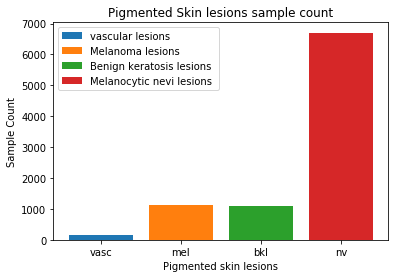

In [3]:
dx = df['dx']
vasc_count = len(dx[dx == 'vasc'])
mel_count = len(dx[dx == 'mel'])
bkl_count = len(dx[dx == 'bkl'])
nv_count = len(dx[dx == 'nv'])
categories = ['vasc', 'mel', 'bkl', 'nv']
counts = [vasc_count, mel_count, bkl_count, nv_count]
plt.bar(categories[0], counts[0], label = 'vascular lesions')
plt.bar(categories[1], counts[1], label = 'Melanoma lesions')
plt.bar(categories[2], counts[2], label = 'Benign keratosis lesions')
plt.bar(categories[3], counts[3], label = 'Melanocytic nevi lesions ')
plt.title('Pigmented Skin lesions sample count')
plt.ylabel('Sample Count')
plt.xlabel('Pigmented skin lesions')
plt.legend()
plt.plot()

## Data Removal 

In [7]:
df_modified = df.drop(columns=['sex', 'age', 'localization'])
bkl_results = df_modified['dx']
bkl_df = df_modified[bkl_results == 'bkl']
vasc_df = df_modified[bkl_results == 'vasc']
nv_df = df_modified[bkl_results == 'nv']
mel_df = df_modified[bkl_results == 'mel']
data_df = pd.concat([bkl_df, nv_df, mel_df, vasc_df])
data_df.head()

,lesion_id,image_id,dx,dx_type
0,HAM_0000118,ISIC_0027419,bkl,histo
1,HAM_0000118,ISIC_0025030,bkl,histo
2,HAM_0002730,ISIC_0026769,bkl,histo
3,HAM_0002730,ISIC_0025661,bkl,histo
4,HAM_0001466,ISIC_0031633,bkl,histo


 # Data Prepration And Saving into the pickle file in serialised format


In [9]:
X = data_df['image_id']
y = data_df['dx']
X_train_cat, X_test, y_train_cat, y_test = train_test_split(X, y, test_size = 0.2, random_state=23, shuffle=True) # split the data into
X_train, X_validation, y_train, y_validation =  train_test_split(X_train_cat, y_train_cat, test_size = 0.1)
print("X_train, y_train shapes are {}{}".format(X_train.shape, y_train.shape))
print("X_test, y_test shapes are {}{}".format(X_test.shape, y_test.shape))
print("X_validation, y_validation shapes are {}{}".format(X_validation.shape, y_validation.shape))

X_train, y_train shapes are (6522,)(6522,)
X_test, y_test shapes are (1812,)(1812,)
X_validation, y_validation shapes are (725,)(725,)


In [10]:
X_train_images = X_train.to_frame()
X_test_images = X_test.to_frame()
X_validation_images = X_validation.to_frame()
y_train_labels = y_train.to_frame()
y_test_labels = y_test.to_frame()
y_validation_labels = y_validation.to_frame()
y_validation_labels.head()

,dx
447,bkl
7841,nv
5655,nv
1437,mel
5992,nv


In [6]:
os.chdir("Images")

In [8]:
# save the images to new Folder

path = os.getcwd()
print(path)

for imageName in X_test:
    imageName = imageName + ".jpg"
    src = imageName
    des = "../test_data/"
    r = shutil.copy(src, des)

for imageName in X_train:
    imageName = imageName + ".jpg"
    src = imageName
    des = "../train_data/"
    r = shutil.copy(src, des)

for imageName in X_validation:
    imageName = imageName + ".jpg"
    src = imageName
    des = "../validation_data/"
    r = shutil.copy(src, des)

print("Done performing task")

C:\Users\Data\Desktop\Deep Learning\Images
Done performing task


In [9]:
os.chdir("../")
os.getcwd()

'C:\\Users\\Data\\Desktop\\Deep Learning'

In [10]:
X_test_images.shape

(1812, 1)

In [11]:
os.chdir("test_data")

C:\Users\Data\Desktop\Deep Learning\test_data


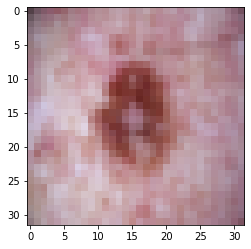

In [12]:
# Now, converting this data into the numpy array by reading it from the file.
print(os.getcwd())
arr_data = []
for imageName in X_test_images["image_id"]:
    path = imageName + ".jpg"
    img = Image.open(path)
    height, width = img.size
    img = img.resize((32, 32)) # This will transform the image into 32 * 32 pixel
    img_data = np.asarray(img)
    arr_data.append(img_data)

plt.imshow(arr_data[1])


In [13]:
os.chdir("../")
path = os.getcwd()
path

'C:\\Users\\Data\\Desktop\\Deep Learning'

In [14]:
t = np.array(arr_data)
t.shape
test_y_labels = []
y_labels_test = y_test_labels["dx"].values
for label in y_labels_test:
    if(label == 'mel'):
        test_y_labels.append(1)
    elif(label == 'vasc'):
        test_y_labels.append(2)
    elif(label == 'bkl'):
        test_y_labels.append(4)
    else:
        test_y_labels.append(3)
y_final_test = np.array(test_y_labels, dtype="uint8")
y_final_test

array([3, 1, 3, ..., 4, 3, 3], dtype=uint8)

In [15]:
testingData = {"imagesData": t, "imageLabels": y_final_test}

with open("test32.pkl", "wb") as file:
    pickle.dump(testingData, file)
print("Done writting testing data")

Done writting testing data


In [16]:
d = None
with open("test32.pkl", "rb") as file:
    d = pickle.load(file)
len(d['imagesData'])

1812

C:\Users\Data\Desktop\Deep Learning\train_data


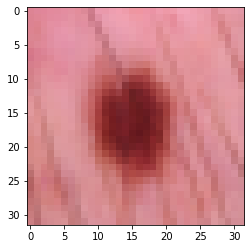

In [17]:
os.chdir("train_data")
path = os.getcwd()
print(path)

arr_data_x_train = []
for imageName in X_train_images["image_id"]:
    path = imageName + ".jpg"
    img = Image.open(path)
    height, width = img.size
    img = img.resize((32, 32)) # This will transform the image into 224 * 224 pixel
    img_data = np.asarray(img)
    arr_data_x_train.append(img_data)
    
# arr_data_x_train
plt.imshow(arr_data_x_train[45])

In [18]:
p = np.array(arr_data_x_train)
p.shape

(6522, 32, 32, 3)

In [19]:
train_y_labels = []
y_train_test = y_train_labels["dx"].values
for label in y_train_test:
    if(label == 'mel'):
        train_y_labels.append(1)
    elif(label == 'vasc'):
        train_y_labels.append(2)
    elif(label == 'bkl'):
        train_y_labels.append(4)
    else:
        train_y_labels.append(3)
        
y_train_final = np.array(train_y_labels, dtype="uint8")
y_train_final

array([1, 1, 3, ..., 3, 3, 3], dtype=uint8)

In [20]:
os.chdir("../")
os.getcwd()

trainingData = {"imagesData": p, "labels": y_train_final}
with open("train32.pkl", "wb") as file:
    pickle.dump(trainingData, file)
print("Done writting the file contents.")

Done writting the file contents.


In [21]:
trdata = None
with open("train32.pkl", "rb") as file:
    trdata = pickle.load(file)
len(trdata['imagesData'])

6522

In [22]:
os.chdir("validation_data")

In [23]:
path = os.getcwd()
path

'C:\\Users\\Data\\Desktop\\Deep Learning\\validation_data'

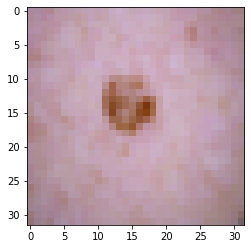

In [24]:
v = []
for imageName in X_validation_images["image_id"]:
    path = imageName + ".jpg"
    img = Image.open(path)
    height, width = img.size
    img = img.resize((32, 32)) # This will transform the image into 32 * 32 pixel
    img_data = np.asarray(img)
    v.append(img_data)

plt.imshow(v[1])

In [25]:
len(v)

725

In [26]:
train_val_labels = []
y_val_test = y_validation_labels["dx"].values

for label in y_val_test:
    if(label == 'mel'):
        train_val_labels.append(1)
    elif(label == 'vasc'):
        train_val_labels.append(2)
    elif(label == 'bkl'):
        train_val_labels.append(4)
    else:
        train_val_labels.append(3)
        
y_validation_final = np.array(train_val_labels, dtype="uint8")

In [27]:
len(y_validation_final)

725

In [28]:
validationData = {"imagesData": v, "labels": y_validation_final}

In [29]:
os.chdir("../")
os.getcwd()

'C:\\Users\\Data\\Desktop\\Deep Learning'

In [30]:
with open("val32.pkl", "wb") as file:
    pickle.dump(validationData, file)
print("Done writting the file contents.")

Done writting the file contents.
